# RedLab/Hack
## Разработка модели для выявления аномалий во временном ряду

# Содержание
1. Описание проекта
2. Предлагаемое решение
3. Общие настройки
4. Выгрузка данных
5. Разведочный агнализ
6. Обучение моделей

# 1. Описание проекта

Простои в работе современных ИТ-систем стоят очень дорого. Для того, чтобы их избежать, системы мониторинга должны помогать людям выявлять
странности в поведении системы на основании собираемых данных телеметрии и своевременно оповещать о них операторов и техническую команду.

Для решения этой задачи разработан прототип сервиса, который анализирует временной ряд и размечает выявленные аномалии в данных.

**Аномалия** — отклонение от нормы, от общей закономерности, неправильность. Применительно к ИТ-системе, аномалией считается отклонение
от нормального поведения всей системы или ее отдельной части. Важно понимать, что аномалия это не частое явление в ИТ-системах
и его невозможно четко формализовать, т.к. это любое отклонение от нормального поведения.

Также, данные могут иметь сезонный характер и тренды. Это не должно
учитываться как аномалия.

**Вводные данные** - слепок данных телеметрии реальной системы за месяц работы с шагом в 1 минуту для анализа и обучения модели. 
Для проверки результата будет предоставлен тестовый набор данных.

Оценить точность решения можно через Numenta Anomaly Score (часть Numenta Anomaly Benchmark)

[Dataset](https://drive.google.com/drive/folders/1ym_jj7Q2siG8EQ2ZcV-et6F1KdK6-olU)

<table>
  <caption>
    Критерии оценивания
  </caption>
  <thead>
    <tr>
      <th>Критерий</th>
      <th>Описание</th>
      <th>Шкала</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Работоспособность прототипа</td>
      <td>
        Оценка работоспособности решения. Разработанное решение должно
        функционировать, запускаться и выдавать требуемый результат. Мелкие
        ошибки допустимы, а также частично реализованный функционал.
      </td>
      <td>1-10</td>
    </tr>
    <tr>
      <td>Соответствие функциональным требованиям</td>
      <td>
        Проверяется соответствие созданного решения поставленной задаче в
        описании кейса, в полной мере ли реализована задача. Насколько
        предложенное решение закрывает выявленную проблему; Дополнительный
        функционал решения.
      </td>
      <td>1-10</td>
    </tr>
    <tr>
      <td>Технологичность</td>
      <td>
        Оценивается качество исходного кода и подходы к разработке. Уникальность
        технического решения.
      </td>
      <td>1-10</td>
    </tr>
    <tr>
      <td>Презентация</td>
      <td>
        Оценивается выступление команды по следующим критериям: структура
        презентации и выступления, питч.
      </td>
      <td>1-10</td>
    </tr>
    <tr>
      <td>Потенциал</td>
      <td>
        Оценивается возможность использования разработанного прототипа в
        реальной практике, а также возможность развития предложенного решения.
        Ноу-хау.
      </td>
      <td>1-10</td>
    </tr>
  </tbody>
</table>

<table>
  <caption>
    Расписание
  </caption>
  <thead>
    <tr>
      <th>Дата</th>
      <th>Время</th>
      <th>Описание</th>
      <th>Ссылка</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>24.05.2024</td>
      <td>17:00-17:30</td>
      <td>Открытие хакатона</td>
      <td></td>
    </tr>
    <tr>
      <td>24.05.2024</td>
      <td>18:00-18:30</td>
      <td>Презентация кейсов</td>
      <td></td>
    </tr>
    <tr>
      <td>24.05.2024</td>
      <td>20:00-20:30</td>
      <td>Мастер-класс №1</td>
      <td></td>
    </tr>
    <tr>
      <td>25.05.2024</td>
      <td>10:00-12:00</td>
      <td>Чек-поинт №1</td>
      <td></td>
    </tr>
    <tr>
      <td>25.05.2024</td>
      <td>15:00-16:00</td>
      <td>Мастер-класс №2</td>
      <td></td>
    </tr>
    <tr>
      <td>25.05.2024</td>
      <td>18:00-20:00</td>
      <td>Чек-поинт №2</td>
      <td></td>
    </tr>
    <tr>
      <td>26.05.2024</td>
      <td>12:00</td>
      <td>Стоп-кодинг</td>
      <td></td>
    </tr>
    <tr>
      <td>26.05.2024</td>
      <td>16:00-18:00</td>
      <td>Pitch-сессия</td>
      <td></td>
    </tr>
    <tr>
      <td>26.05.2024</td>
      <td>18:00-20:30</td>
      <td>Работа жюри</td>
      <td></td>
    </tr>
    <tr>
      <td>26.05.2024</td>
      <td>21:00-21:30</td>
      <td>
        <p>Подведение итогов.</p>
        <p>Награждение победителей.</p>
        <p>Закрытие хакатона</p>
      </td>
      <td></td>
    </tr>
  </tbody>
</table>


# 2. Предлагаемое решение

- name - название метрики
- point - временная отметка
- call_count - значение метрики
- total_call_time - в контексте метрики ‘HttpDispatcher’, это суммарное время обработки всех http-запросов за 1 минуту.  

Организатор предложил следующие метрики:
- Web Response - время ответа сервиса на внешний http-запрос:
```
SELECT
    point
    total_call_time / call_count
WHERE
    scope = ''
    AND
    name = 'HttpDispatcher'
```
- Throughput - пропускная способность сервиса (зарос/мин):
```
SELECT
    point,
    call_count
WHERE
    scope = ''
    AND
    name = 'HttpDispatcher'
```
- APDEX - синтетический показатель здоровья сервера [0 (болеет) - 1(здоров)]
```
SELECT
    point,
    (call_count + total_call_time / 2) / (call_count + total_call_time + total_exclusive_time)
WHERE
    scope = ''
    AND
    name = 'Apdex'
```
- Error - процент ошибок в обработанных запросах
```
SELECT
    point,
    call_count (name='Errors/allWeb') / call_count (name='HttpDispatcher')
WHERE
    scope = ''
    AND
    name in ('Errors/allWeb', 'HttpDispatcher'
```

Аномалии показаны на следующих интервалах:
- Throughput 2024-04-19 7:15-8:00
- Throughput 2024-04-20 6:20-7:10 -> Web Response 2024-04-20 7:20-7:40
- Throughput 2024-04-20 6:15-7:15
- Web Response 2024-04-20 9:15-10:00

# 3. Общие настройки

## 3.1. Импорт библиотек

In [1]:
# Общие библиотеки
import os

# Математические расчёты
import numpy as np
import pandas as pd

# Поиск аномалий
import pyod

# Модели поиска аномалий
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.inne import INNE
from pyod.models.gmm import GMM
from pyod.models.kde import KDE
from pyod.models.lmdd import LMDD
from pyod.models.dif import DIF
from pyod.models.copod import COPOD
from pyod.models.ecod import ECOD
from pyod.models.suod import SUOD
from pyod.models.qmcd import QMCD
from pyod.models.sampling import Sampling
from pyod.models.kpca import KPCA
from pyod.models.lunar import LUNAR

# Визуализация
import matplotlib.pyplot as plt

# Сохраняем модели
from joblib import dump, load

## 3.2. Глобальные параметры

In [2]:
# Для тестирования
outliers_fraction = 0.01 # предполагаемая доля вылетов
random_state = 0

# 4. Выгрузка данных

In [3]:
data = pd.read_csv('metrics_collector.tsv', sep='\t', low_memory=False)

In [4]:
data.columns = [
    'account_id',
    'name',
    'point',
    'call_count',
    'total_call_time',
    'total_exclusive_time',
    'min_call_time', 'max_call_time',
    'sum_of_squares',
    'instances',
    'language',
    'app_name',
    'app_id',
    'scope',
    'host',
    'display_host',
    'pid',
    'agent_version',
    'labels'
]
data.point = pd.to_datetime(data.point)

In [5]:
data.head(10)

,account_id,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,language,app_name,app_id,scope,host,display_host,pid,agent_version,labels
0,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
1,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
2,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
3,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
4,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
5,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:38:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
6,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:39:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
7,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:40:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
8,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:41:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
9,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:42:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}


In [6]:
data.shape

(18363749, 19)

In [7]:
data.point.min(), data.point.max()

(Timestamp('2024-04-15 23:32:00'), Timestamp('2024-05-16 00:58:00'))

**Вывод:**
- Данные представляют собой выгрузку из Clickhouse в формате TSV
- Данные представляют собой 18 млн записей, временная точка point не уникальна, так как раз в минуту идёт обращение к нескольким сервисам
- Данные выгружены за период c 15.04.2024 23:32 по 16.05.2024 00:58 с дискретность в 1 мин

# 5. Разведочный анализ

In [8]:
def make_synthetic_metrics(X):
    '''
    Инициируемся метриками от организаторов:
        - WebResponse - время ответа сервиса на внешний http-запрос
        - Throughput - пропускная способность сервиса (зарос/мин)
        - APDEX - синтетический показатель здоровья сервера [0 (болеет) - 1(здоров)]
        - Error - процент ошибок в обработанных запросах
    '''
    X['WebResponse'] = None
    X['Throughput'] = None
    X['APDEX'] = None
    X['Error'] = None

    # Определяем требуемые индексы
    dispatcher_index = X[(X['name'] == 'HttpDispatcher') & (data['scope'].isna())].index
    apdex_index = X[(X['name'] == 'Apdex') & (data['scope'].isna())].index
    errors_index = X[(X['name'] == 'Errors/allWeb') & (data['scope'].isna())].index

    # вычисляем метрики
    X.loc[dispatcher_index, 'WebResponse'] = X.loc[dispatcher_index, 'total_call_time'] / X.loc[dispatcher_index, 'call_count']
    X.loc[dispatcher_index, 'Throughput'] = X.loc[dispatcher_index, 'call_count']
    X.loc[apdex_index, 'APDEX'] = (
        (X.loc[apdex_index, 'call_count'] + X.loc[apdex_index, 'total_call_time'] / 2)
        /
        (X.loc[apdex_index, 'call_count'] + X.loc[apdex_index, 'total_call_time'] + X.loc[apdex_index, 'total_exclusive_time'])
    )
    # X.loc[dispatcher_index, 'Error'] = X.loc[errors_index, 'call_count'] / X.loc[dispatcher_index, 'call_count']

In [9]:
data[
    (data['name'] != 'HttpDispatcher')
    &
    (data['name'] != 'Apdex')
    &
    (data['name'] != 'Errors/allWeb')
]

,account_id,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,language,app_name,app_id,scope,host,display_host,pid,agent_version,labels
0,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
1,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
2,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
3,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
4,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363744,1,WebTransactionTotalTime/NormalizedUri/404/*,2024-05-16 00:43:00,48.0,0.008898,0.008898,0.000107,0.000864,0.000002,1.0,java,[GMonit] Collector,17592186045423,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{}
18363745,1,WebTransactionTotalTime/NormalizedUri/404/*,2024-05-16 00:44:00,48.0,0.009156,0.009156,0.000114,0.000864,0.000002,1.0,java,[GMonit] Collector,17592186045423,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{}
18363746,1,WebTransactionTotalTime/NormalizedUri/404/*,2024-05-16 00:45:00,48.0,0.008386,0.008386,0.000101,0.000337,0.000002,1.0,java,[GMonit] Collector,17592186045423,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{}
18363747,1,WebTransactionTotalTime/NormalizedUri/404/*,2024-05-16 00:46:00,48.0,0.008576,0.008576,0.000101,0.000529,0.000002,1.0,java,[GMonit] Collector,17592186045423,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{}


In [10]:
make_synthetic_metrics(data)

In [11]:
def plot_metric(data, y, start=None, end=None):
    '''
    Строим график метрики

    Arguments:
        - data - pd.DataFrame - массив данных
        - y - str - отображаемый параметр
        - start - str|dt.datetime - начало отображения параметра
        - end - конец отображения параметра
    '''
    if start is None:
        start = data.point.min()
    if end is None:
        end = data.point.max()
    local_data = data[(start <= data.point) & (data.point <= end)]

    plt.figure(figsize=(20, 5))
    plt.plot(local_data.point, local_data[y])
    plt.ylabel(y)

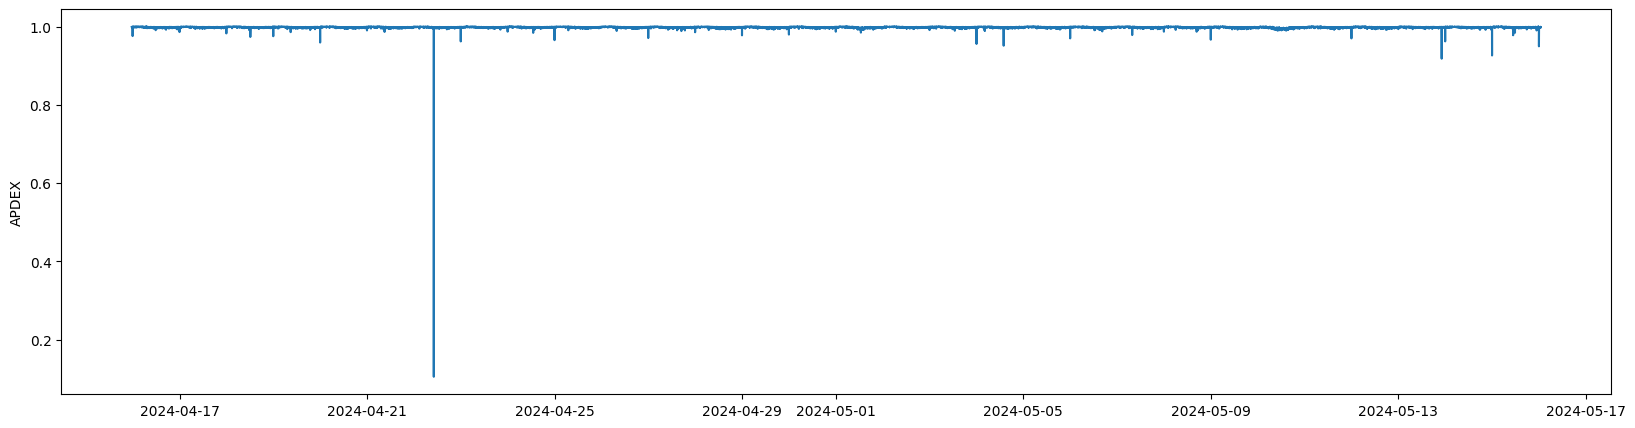

In [12]:
plot_metric(data, 'APDEX')

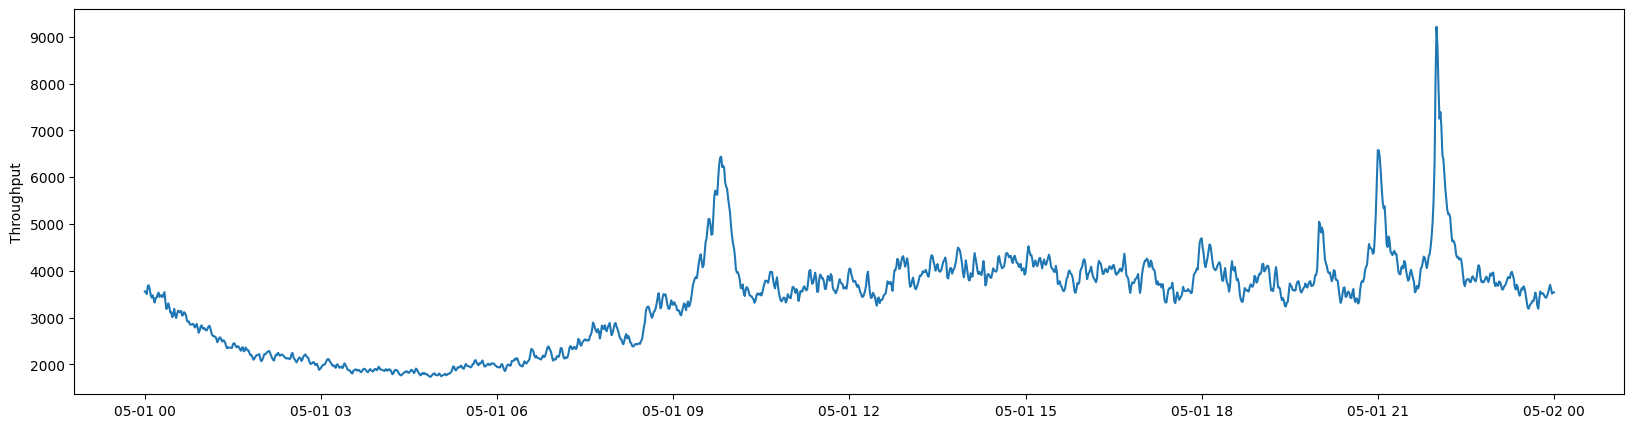

In [13]:
plot_metric(data, 'Throughput', '2024-05-01', '2024-05-02')

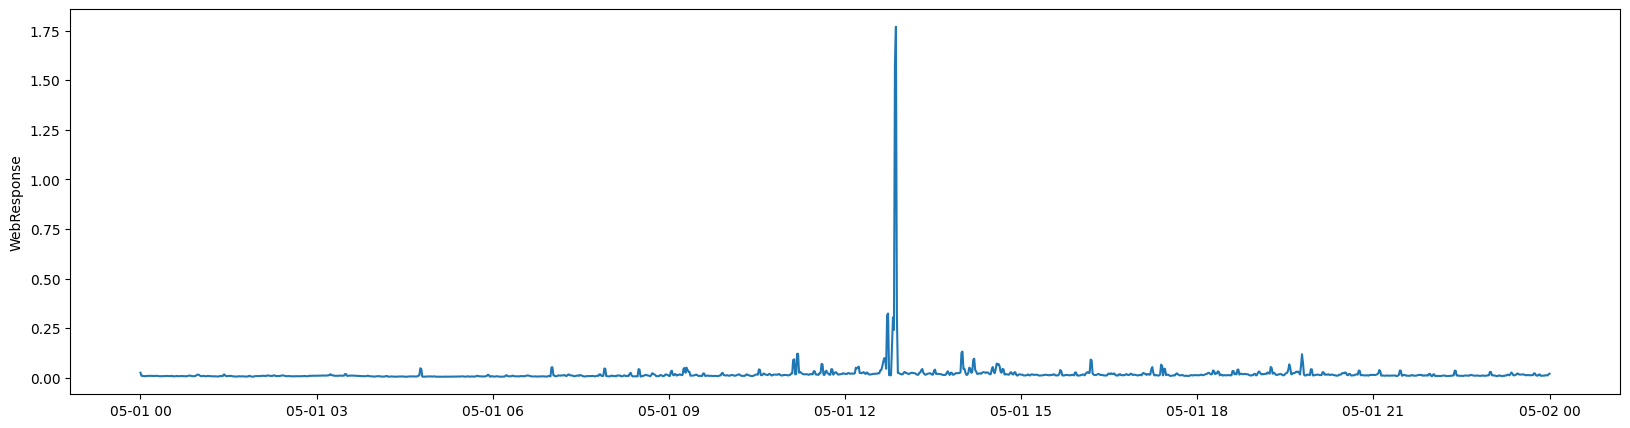

In [14]:
plot_metric(data, 'WebResponse', '2024-05-01', '2024-05-02')

In [15]:
# Выбрасываем столбцы с одинаковыми значениями
data = data.drop(['account_id', 'language', 'app_name', 'app_id', 'display_host', 'pid', 'labels'], axis=1)

In [16]:
data[['call_count', 'total_call_time', 'total_exclusive_time', 'min_call_time', 'max_call_time', 'sum_of_squares', 'instances']].corr()

,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances
call_count,1.000000,0.058720,0.065832,-0.012563,-0.000623,-0.000241,0.047679
total_call_time,0.058720,1.000000,0.970286,0.146612,0.566318,0.878251,0.001470
total_exclusive_time,0.065832,0.970286,1.000000,0.151796,0.583613,0.904767,-0.001214
min_call_time,-0.012563,0.146612,0.151796,1.000000,0.252079,0.016403,0.006534
max_call_time,-0.000623,0.566318,0.583613,0.252079,1.000000,0.667140,-0.008498
sum_of_squares,-0.000241,0.878251,0.904767,0.016403,0.667140,1.000000,-0.006241
instances,0.047679,0.001470,-0.001214,0.006534,-0.008498,-0.006241,1.000000


Выводы:

Лишние столбцы:
- account_id - столбец, значения в котором для каждой точки равны 1
- language - столбец, значения в котором для каждой точки равны 'java'
- app_name - столбец, значения в котором для каждой точки равны '[GMonit] Collector'
- app_id - столбец, значения в котором для каждой точки равны '17592186045423'
- display_host - столбец, значения которого полностью совпадают со значениями в столбце host
- pid - столбец, значения в котором для каждой точки равны 1
- labels - пустой столбец

# 6. Обучение моделей

In [17]:
def X_generator(data, columns):
    '''
    Формируем данные для обучения
    '''
    result = []
    for column in columns:
        X = data[['point', column]]
        result.append(X.dropna().set_index('point').sort_index())
    
    return pd.concat(result, axis=1)

In [18]:
X_train = X_generator(data, [
    'Throughput',
    'WebResponse',
    'APDEX'
])

In [19]:
# Инициализируем модели

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
				 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
				 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
				 LOF(n_neighbors=50)]

classifiers = {
	'Angle-based Outlier Detector (ABOD)':
		ABOD(contamination=outliers_fraction),
	'K Nearest Neighbors (KNN)': KNN(
		contamination=outliers_fraction),
	'Average KNN': KNN(method='mean',
					   contamination=outliers_fraction),
	'Median KNN': KNN(method='median',
					  contamination=outliers_fraction),
	'Local Outlier Factor (LOF)':
		LOF(n_neighbors=35, contamination=outliers_fraction),

	'Isolation Forest': IForest(contamination=outliers_fraction,
								random_state=random_state),
	'Deep Isolation Forest (DIF)': DIF(contamination=outliers_fraction,
									   random_state=random_state),
	'INNE': INNE(
		max_samples=2, contamination=outliers_fraction,
		random_state=random_state,
	),

	'Locally Selective Combination (LSCP)': LSCP(
		detector_list, contamination=outliers_fraction,
		random_state=random_state),
	'Feature Bagging':
		FeatureBagging(LOF(n_neighbors=35),
					   contamination=outliers_fraction,
					   random_state=random_state),
	'SUOD': SUOD(contamination=outliers_fraction),

	'Minimum Covariance Determinant (MCD)': MCD(
		contamination=outliers_fraction, random_state=random_state),

	'Principal Component Analysis (PCA)': PCA(
		contamination=outliers_fraction, random_state=random_state),
	'KPCA': KPCA(
		contamination=outliers_fraction),

	'Probabilistic Mixture Modeling (GMM)': GMM(contamination=outliers_fraction,
												random_state=random_state),

	'LMDD': LMDD(contamination=outliers_fraction,
				 random_state=random_state),

	'Histogram-based Outlier Detection (HBOS)': HBOS(
		contamination=outliers_fraction),

	'Copula-base Outlier Detection (COPOD)': COPOD(
		contamination=outliers_fraction),

	'ECDF-baseD Outlier Detection (ECOD)': ECOD(
		contamination=outliers_fraction),
	'Kernel Density Functions (KDE)': KDE(contamination=outliers_fraction),

	'QMCD': QMCD(
		contamination=outliers_fraction),

	'Sampling': Sampling(
		contamination=outliers_fraction),

	'LUNAR': LUNAR(),

	'Cluster-based Local Outlier Factor (CBLOF)':
		CBLOF(contamination=outliers_fraction,
			  check_estimator=False, random_state=random_state),

	'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
}

In [20]:
def detect_anomalies(data, column, anomalies, model_name, start=None, end=None):
    series = data[column]
    anomalies = series[[series.index[i] for i, anomaly in enumerate(anomalies) if anomaly == 1]]
    plt.figure(figsize=(20, 5))
    plt.plot(series[start:end])
    plt.plot(anomalies[start:end], 'r.')
    plt.title(model_name)
    plt.show()

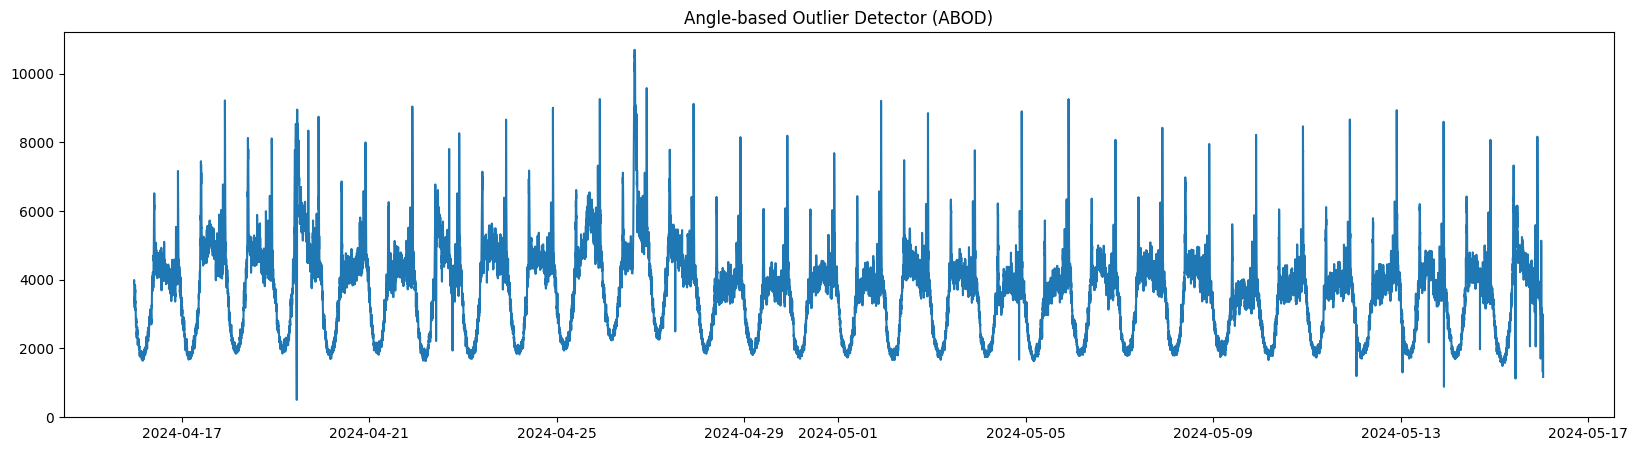

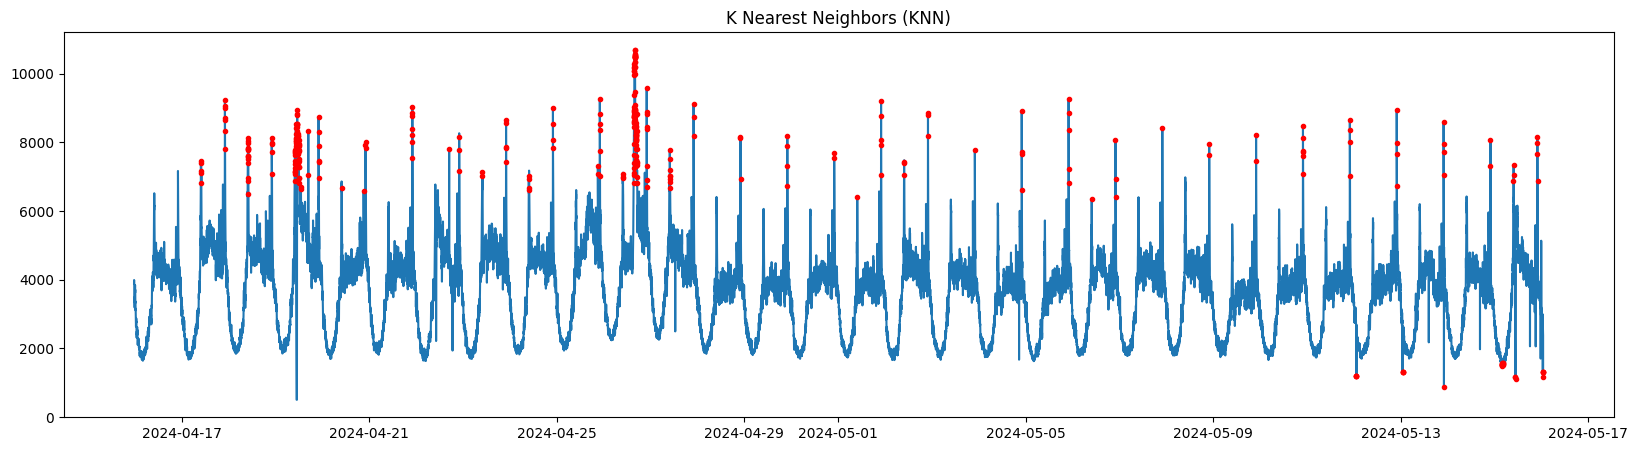

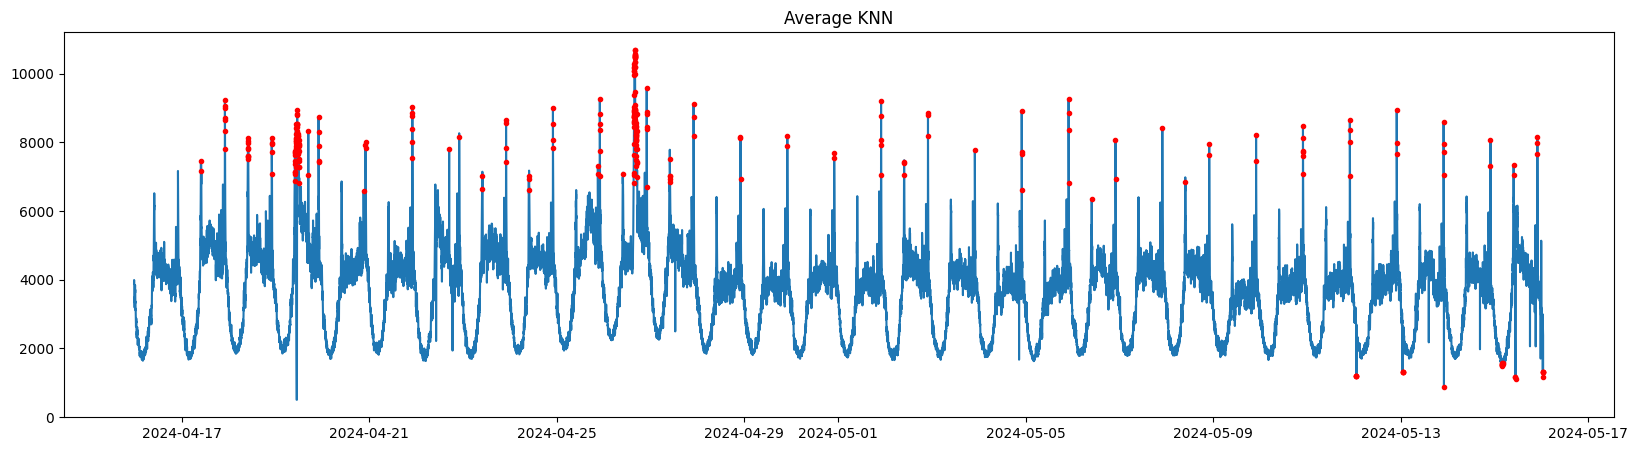

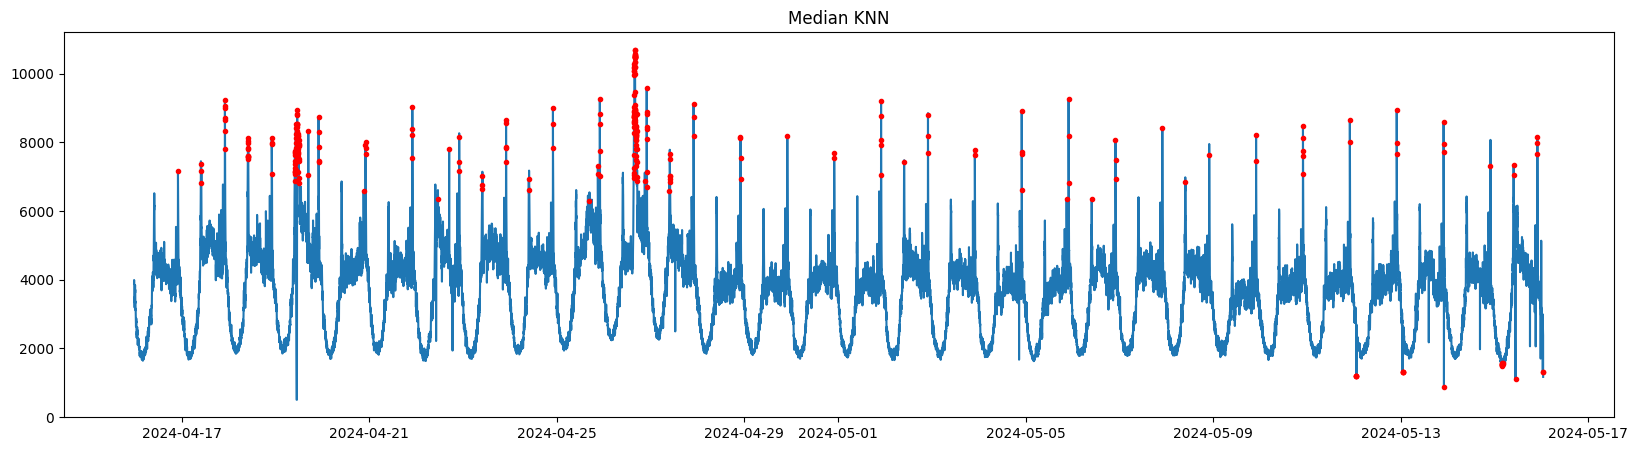

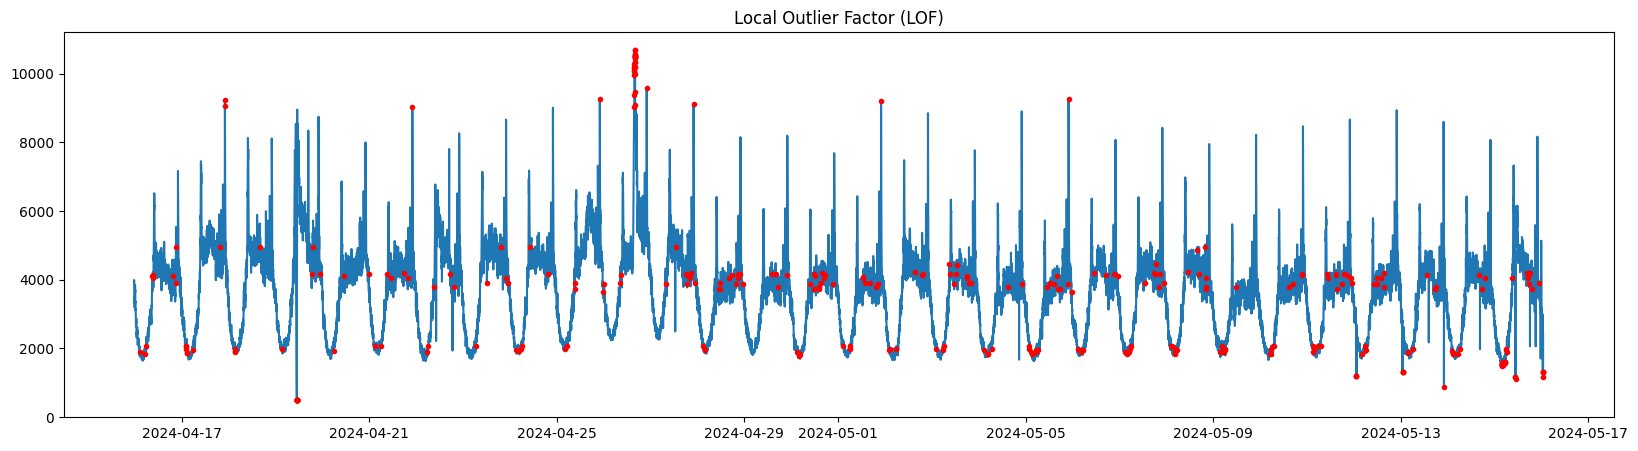

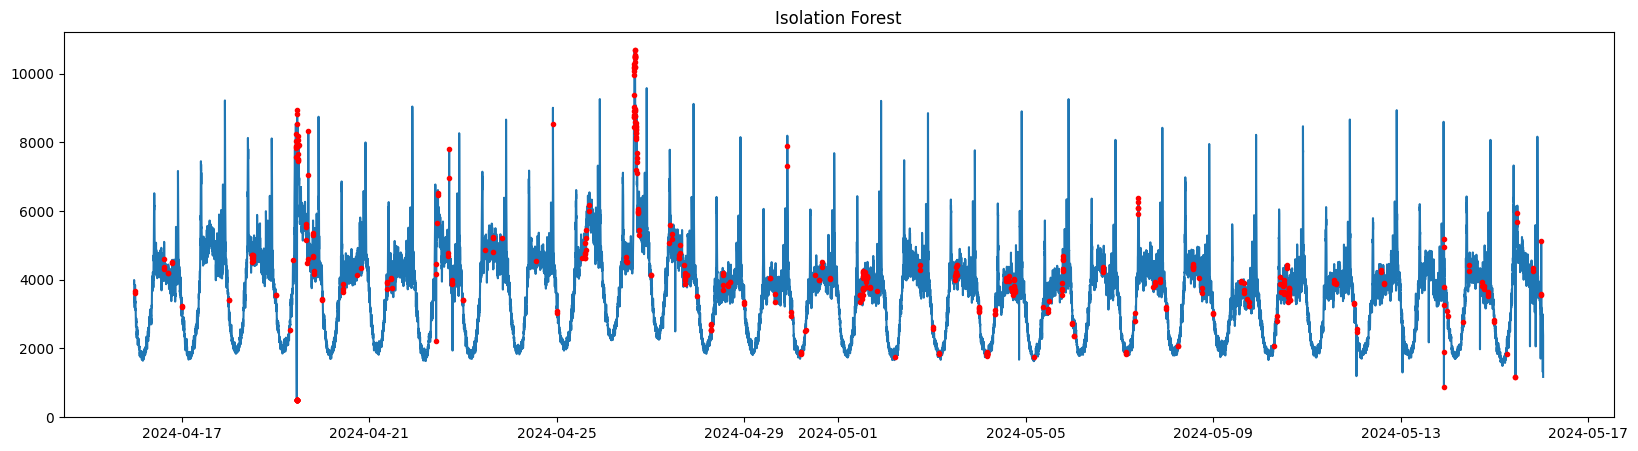

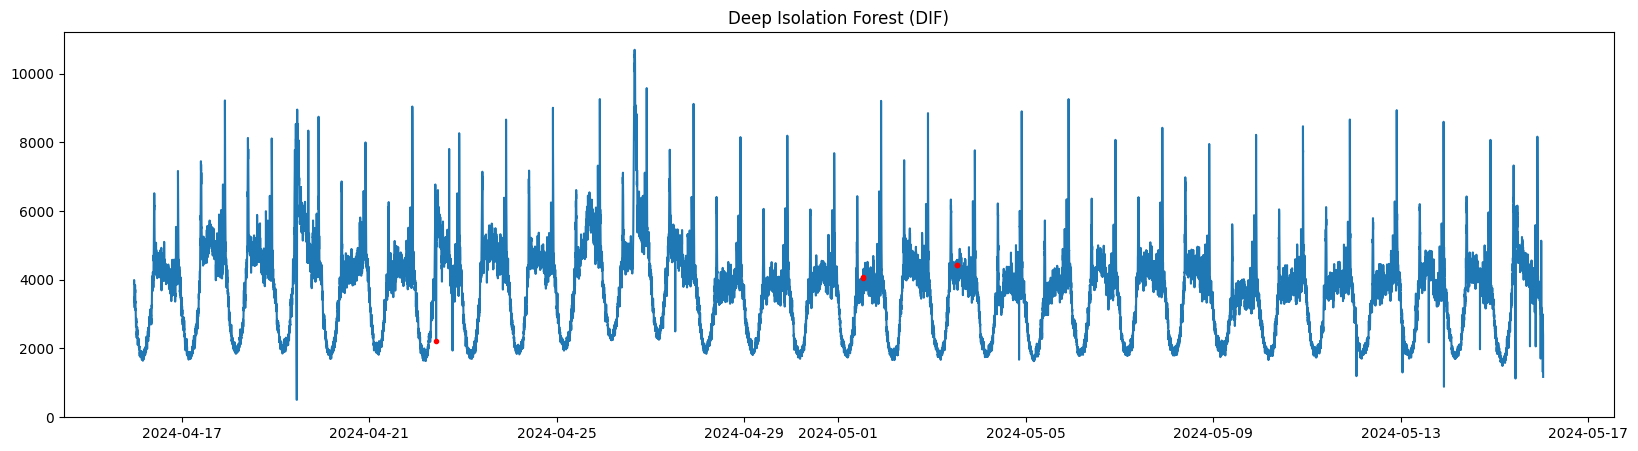

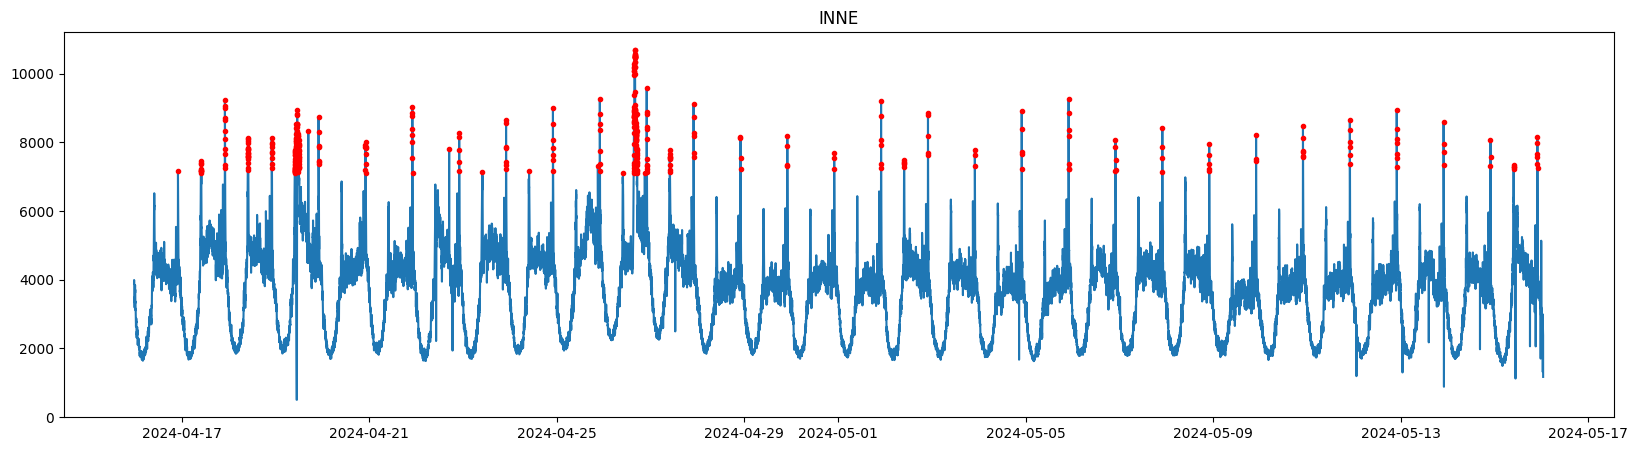

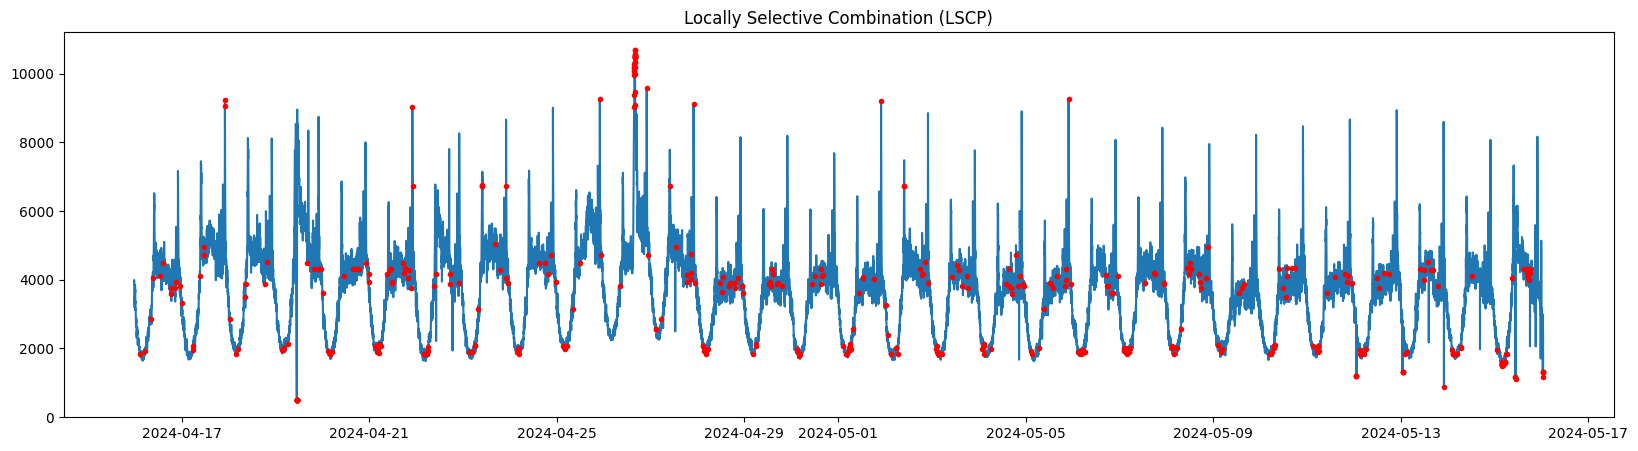

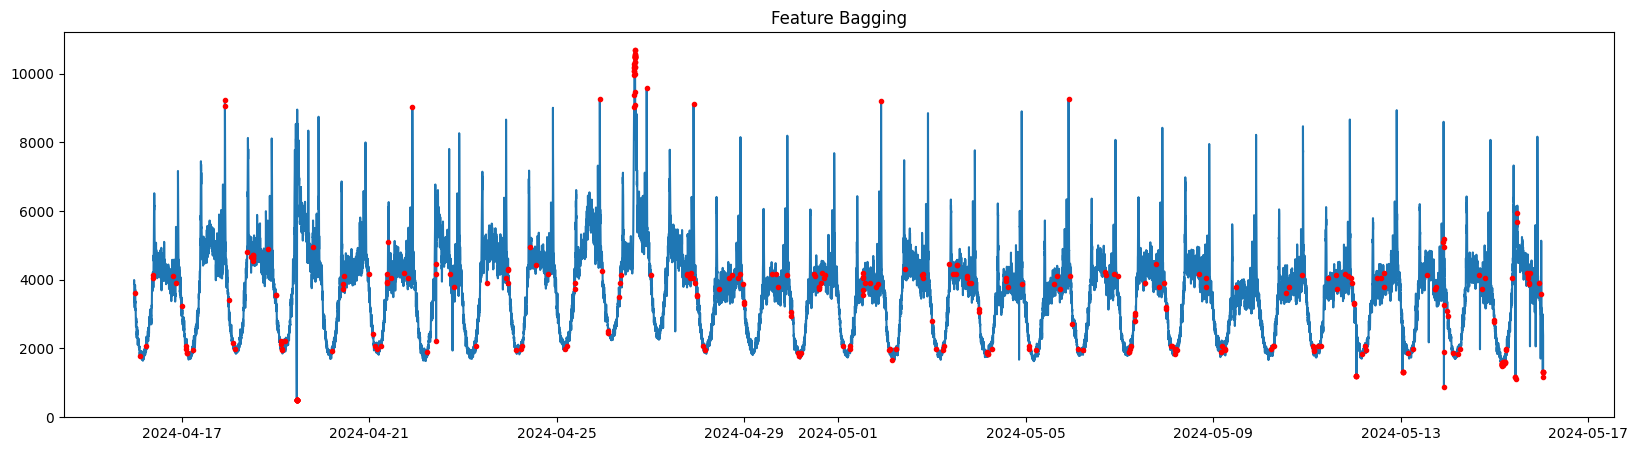

RandomForestRegressor()





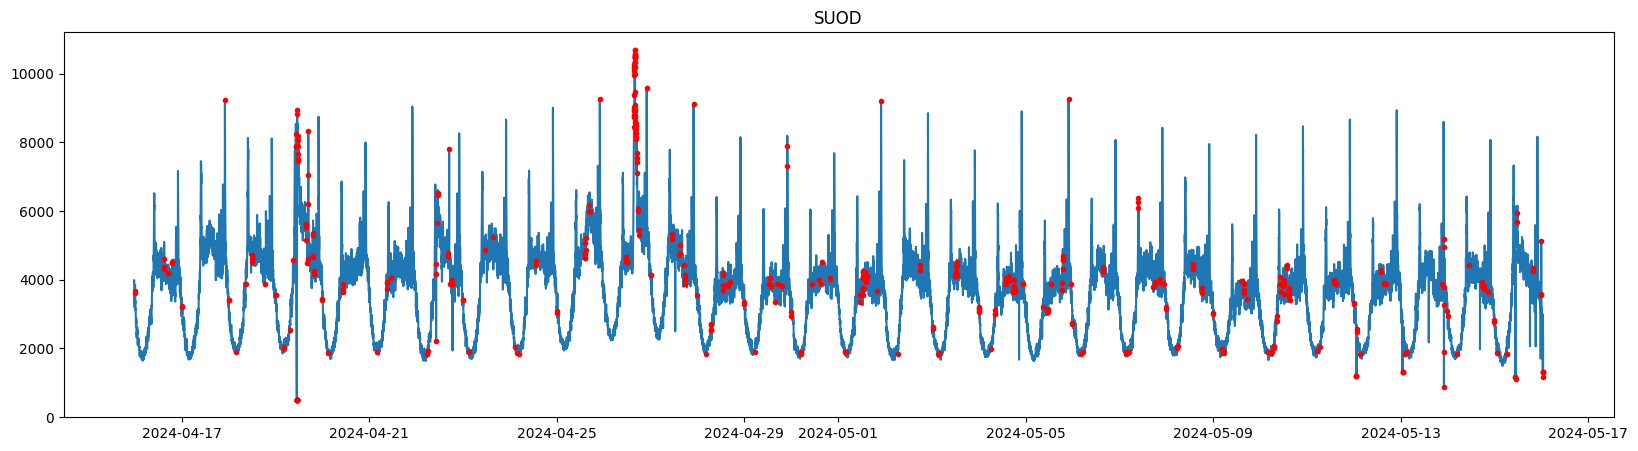

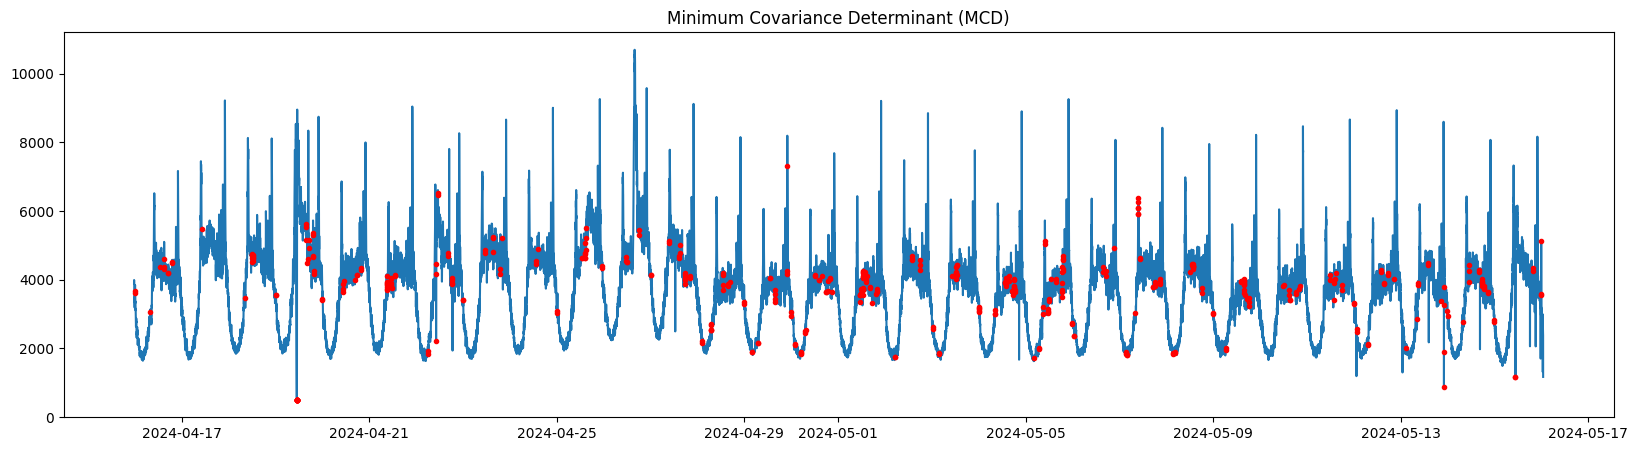

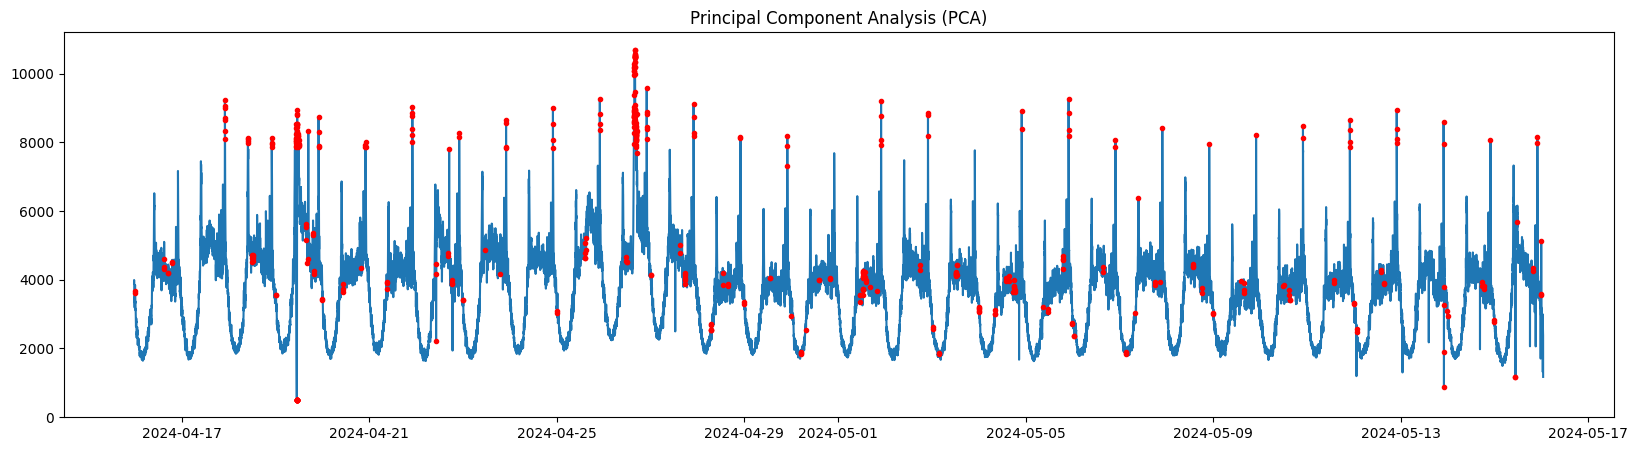

In [ ]:
%%time
for name, model in classifiers.items():
    # Обучаем
    clf = model.fit(X_train)

    # Прогнозируем
    prediction = clf.predict(X_train)  # bool
    proba = [
        100 - y_local[1]
        for y_local in clf.predict_proba(X_train)
    ] # вероятность

    # Визуализируем
    detect_anomalies(
        X_train, 'Throughput',
        prediction,
        name
    )

    # Сохраняем
    dump(clf, f'models/{name}.joblib')

In [155]:
%%time
# Обучаем
clf_name = 'KNN'
knn_clf = KNN(contamination=0.05)
knn_clf.fit(X_train)

# Прогнозируем
prediction = knn_clf.predict(X_train)  # bool
y_train_proba = [100 - y_local[1] for y_local in knn_clf.predict_proba(X_train)] # вероятность

# Сохраняем
dump(knn_clf, 'models/knn.joblib')

CPU times: total: 6.12 s
Wall time: 6.77 s


['models/knn.joblib']

In [144]:
%%time
# Обучаем
forest_clf = IForest(contamination=0.01, random_state=random_state)
forest_clf.fit(X_train)

# Прогнозируем
y_train_pred = forest.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = forest.decision_scores_  # raw outlier scores

dump(forest_clf, 'models/forest.joblib')

CPU times: total: 453 ms
Wall time: 454 ms


['models/forest.joblib']

Number of inliers: 150
Number of outliers: 50
Ground truth shape is (200,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 K Nearest Neighbors (KNN)
Model 3 Average KNN
Model 4 Median KNN
Model 5 Local Outlier Factor (LOF)
Model 6 Isolation Forest

1 fitting Angle-based Outlier Detector (ABOD)

2 fitting K Nearest Neighbors (KNN)


KeyboardInterrupt: 

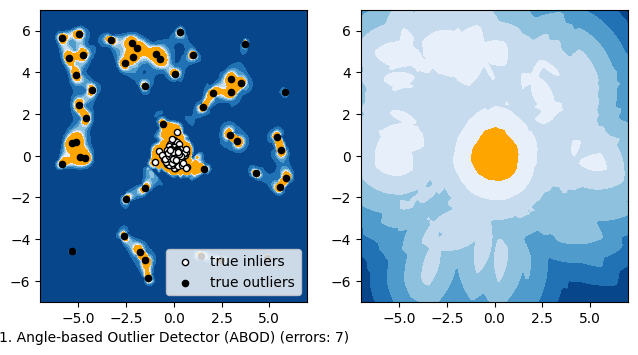

In [154]:
from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
	os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.inne import INNE
from pyod.models.gmm import GMM
from pyod.models.kde import KDE
from pyod.models.lmdd import LMDD

# from pyod.models.dif import DIF
# from pyod.models.copod import COPOD
# from pyod.models.ecod import ECOD
# from pyod.models.suod import SUOD
# from pyod.models.qmcd import QMCD
# from pyod.models.sampling import Sampling
# from pyod.models.kpca import KPCA
# from pyod.models.lunar import LUNAR

# TODO: add neural networks, LOCI, SOS, COF, SOD

# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print(
	'Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(
		shape=ground_truth.shape))
print(ground_truth, '\n')

random_state = 42
# Define nine outlier detection tools to be compared
classifiers = {
	'Angle-based Outlier Detector (ABOD)':
		ABOD(contamination=outliers_fraction),
	'K Nearest Neighbors (KNN)': KNN(
		contamination=outliers_fraction),
	'Average KNN': KNN(method='mean',
					   contamination=outliers_fraction),
	'Median KNN': KNN(method='median',
					  contamination=outliers_fraction),
	'Local Outlier Factor (LOF)':
		LOF(n_neighbors=35, contamination=outliers_fraction),

	'Isolation Forest': IForest(contamination=outliers_fraction,
								random_state=random_state),
	# 'Deep Isolation Forest (DIF)': DIF(contamination=outliers_fraction,
	# 								   random_state=random_state),
	# 'INNE': INNE(
	# 	max_samples=2, contamination=outliers_fraction,
	# 	random_state=random_state,
	# ),

	# 'Locally Selective Combination (LSCP)': LSCP(
	# 	detector_list, contamination=outliers_fraction,
	# 	random_state=random_state),
	# 'Feature Bagging':
	# 	FeatureBagging(LOF(n_neighbors=35),
	# 				   contamination=outliers_fraction,
	# 				   random_state=random_state),
	# 'SUOD': SUOD(contamination=outliers_fraction),

	# 'Minimum Covariance Determinant (MCD)': MCD(
	# 	contamination=outliers_fraction, random_state=random_state),

	# 'Principal Component Analysis (PCA)': PCA(
	# 	contamination=outliers_fraction, random_state=random_state),
	# 'KPCA': KPCA(
	# 	contamination=outliers_fraction),

	# 'Probabilistic Mixture Modeling (GMM)': GMM(contamination=outliers_fraction,
	# 											random_state=random_state),

	# 'LMDD': LMDD(contamination=outliers_fraction,
	# 			 random_state=random_state),

	# 'Histogram-based Outlier Detection (HBOS)': HBOS(
	# 	contamination=outliers_fraction),

	# 'Copula-base Outlier Detection (COPOD)': COPOD(
	# 	contamination=outliers_fraction),

	# 'ECDF-baseD Outlier Detection (ECOD)': ECOD(
	# 	contamination=outliers_fraction),
	# 'Kernel Density Functions (KDE)': KDE(contamination=outliers_fraction),

	# 'QMCD': QMCD(
	# 	contamination=outliers_fraction),

	# 'Sampling': Sampling(
	# 	contamination=outliers_fraction),

	# 'LUNAR': LUNAR(),

	# 'Cluster-based Local Outlier Factor (CBLOF)':
	# 	CBLOF(contamination=outliers_fraction,
	# 		  check_estimator=False, random_state=random_state),

	# 'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
}

# Show all detectors
for i, clf in enumerate(classifiers.keys()):
	print('Model', i + 1, clf)

# Fit the models with the generated data and
# compare model performances
for i, offset in enumerate(clusters_separation):
	np.random.seed(42)
	# Data generation
	X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
	X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
	X = np.r_[X1, X2]
	# Add outliers
	X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

	# Fit the model
	plt.figure(figsize=(20, 22))
	for i, (clf_name, clf) in enumerate(classifiers.items()):
		print()
		print(i + 1, 'fitting', clf_name)
		# fit the data and tag outliers
		clf.fit(X)
		scores_pred = clf.decision_function(X) * -1
		y_pred = clf.predict(X)
		threshold = percentile(scores_pred, 100 * outliers_fraction)
		n_errors = (y_pred != ground_truth).sum()
		# plot the levels lines and the points

		Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
		Z = Z.reshape(xx.shape)
		subplot = plt.subplot(5, 5, i + 1)
		subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
						 cmap=plt.cm.Blues_r)
		# a = subplot.contour(xx, yy, Z, levels=[threshold],
		#                     linewidths=2, colors='red')
		subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
						 colors='orange')
		b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
							s=20, edgecolor='k')
		c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
							s=20, edgecolor='k')
		subplot.axis('tight')
		subplot.legend(
			[
				# a.collections[0],
				b, c],
			[
				# 'learned decision function',
				'true inliers', 'true outliers'],
			prop=matplotlib.font_manager.FontProperties(size=10),
			loc='lower right')
		subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
		subplot.set_xlim((-7, 7))
		subplot.set_ylim((-7, 7))
	plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
	plt.suptitle("25 outlier detection algorithms on synthetic data",
				 fontsize=35)
plt.savefig('ALL.png', dpi=300, bbox_inches='tight')
plt.show()